In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os

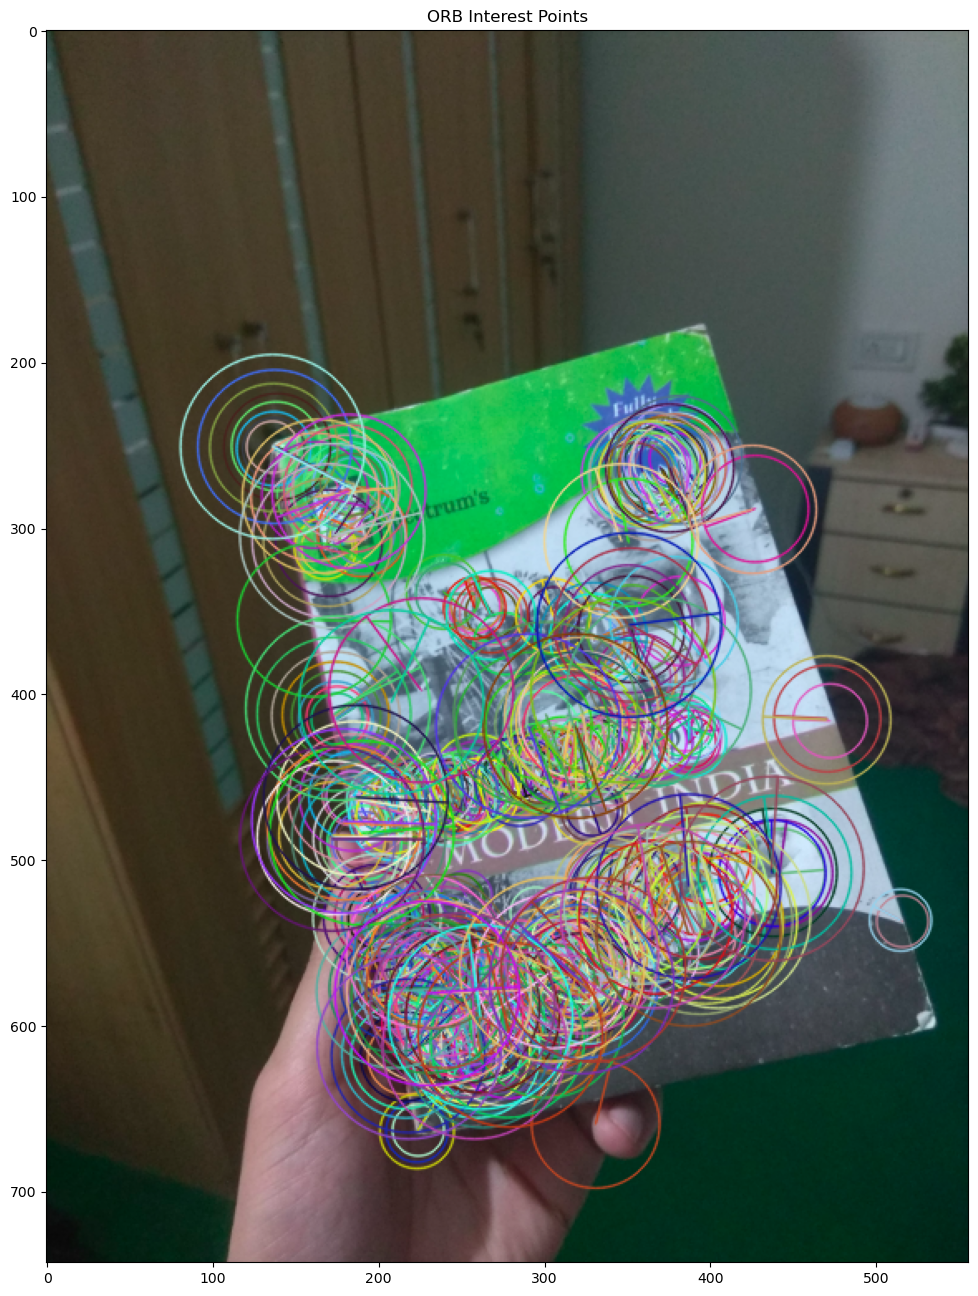

In [ ]:
img_input = cv2.imread(os.path.join('book1.png'))
img_input = cv2.cvtColor(img_input, cv2.COLOR_BGR2RGB)
orb = cv2.ORB_create() 
key_points, description = orb.detectAndCompute(img_input, None)
img_input_keypoints = cv2.drawKeypoints(img_input, 
                                           key_points, 
                                           img_input, 
                                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 
plt.figure(figsize=(16, 16))
plt.title('ORB Interest Points')
plt.imshow(img_input_keypoints) 
plt.show()

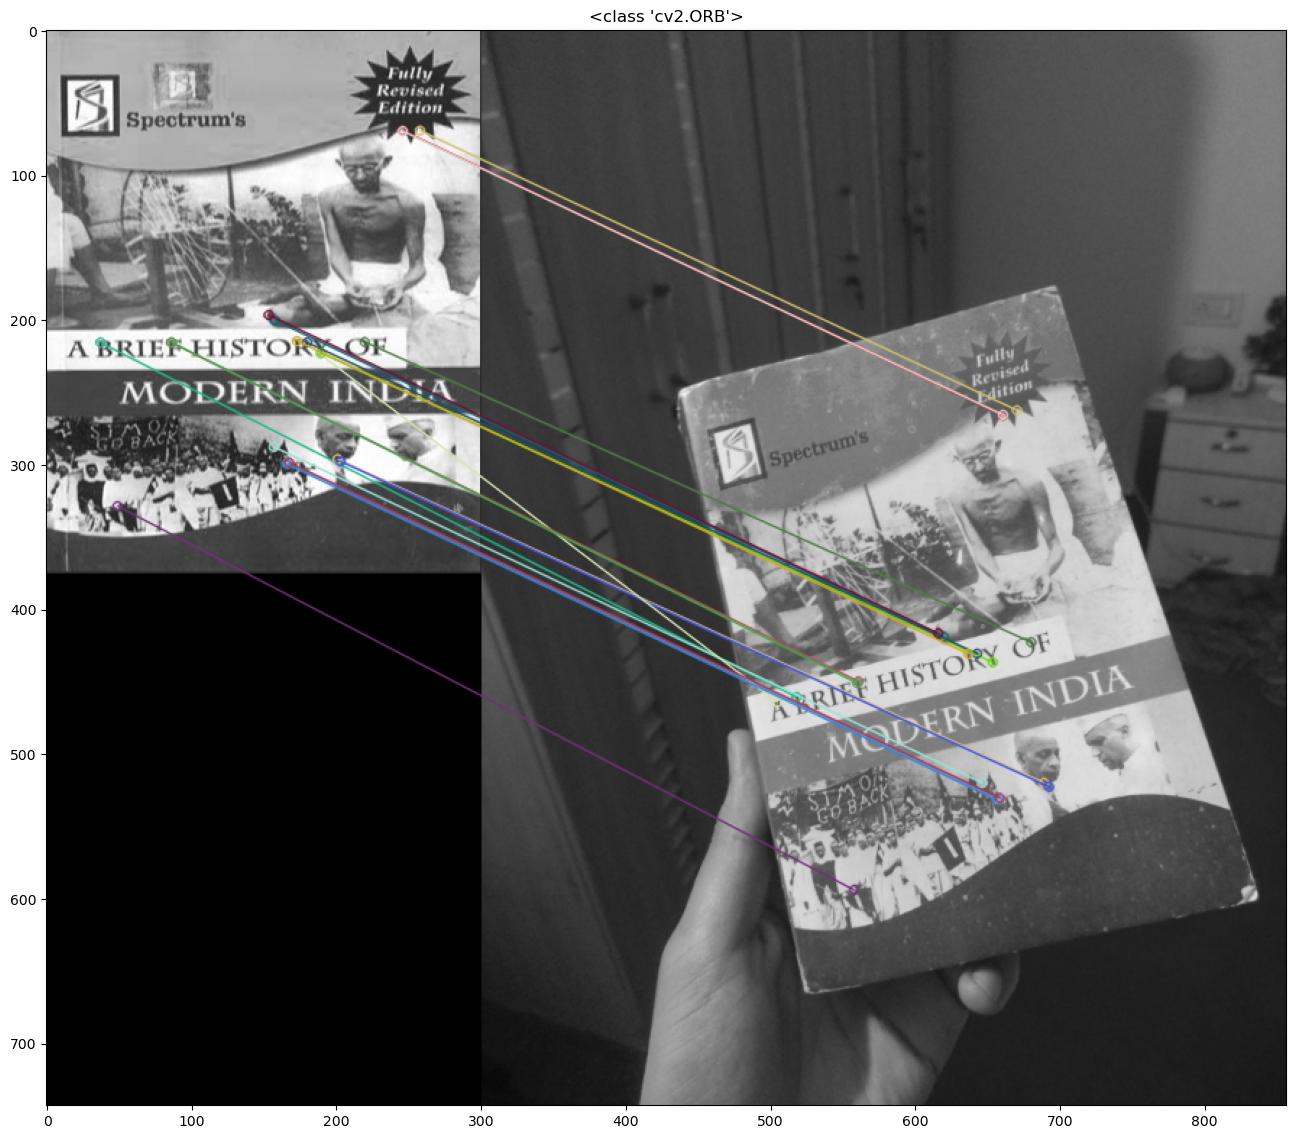

In [ ]:
def image_detect_and_compute(detector, img_name):
    img = cv2.imread(img_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, des = detector.detectAndCompute(img, None)
    return img, kp, des
    

def draw_image_matches(detector, img1_name, img2_name, nmatches=20):

    img1, kp1, des1 = image_detect_and_compute(detector, img1_name)
    img2, kp2, des2 = image_detect_and_compute(detector, img2_name)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance) 
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:nmatches], img2, flags=2) 
    plt.figure(figsize=(16, 16))
    plt.title(type(detector))
    plt.imshow(img_matches)
    plt.show()
    

orb = cv2.ORB_create()
draw_image_matches(orb, 'book3.png', 'book1.png')